<a href="https://colab.research.google.com/github/ZoofishanChohan/Deep-Learning-and-Neural-Networks/blob/main/Autoregressive_Linear_Model_for_Time_Series_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

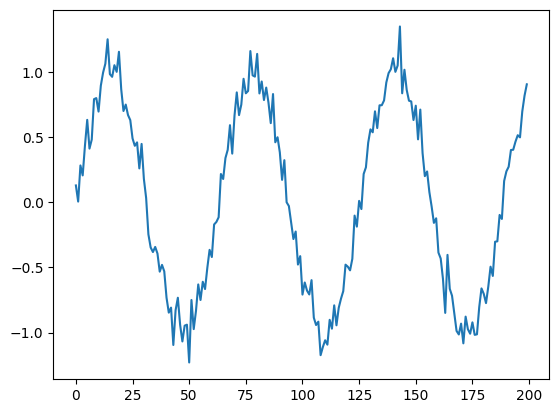

In [2]:
# creating orignal data with noise
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

Creating data set to predict next future values using past T values

In [5]:
# creating data to pridict future value with past T values
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)


X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, ", Y.shape", Y.shape)


X.shape (190, 10) , Y.shape (190,)


Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - loss: 1.7408 - val_loss: 0.1711
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4777 - val_loss: 0.6803
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5940 - val_loss: 0.1355
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1020 - val_loss: 0.1940
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2867 - val_loss: 0.2426
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2378 - val_loss: 0.0554
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0489 - val_loss: 0.1460
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1431 - val_loss: 0.1306
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0933 - val_loss: 0.0430
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0354 - val_loss: 0.0988
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0809 - val_loss: 0.0800
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0518 - val_loss: 0.0419


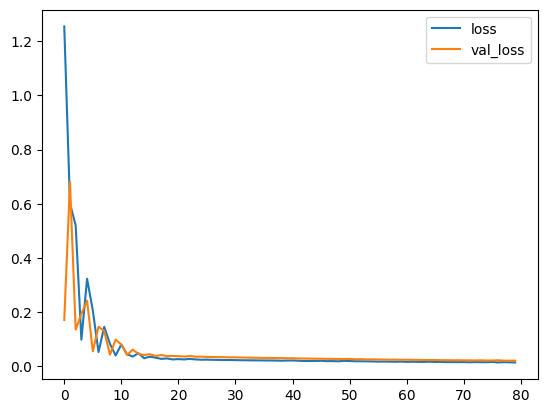

In [7]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i , x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

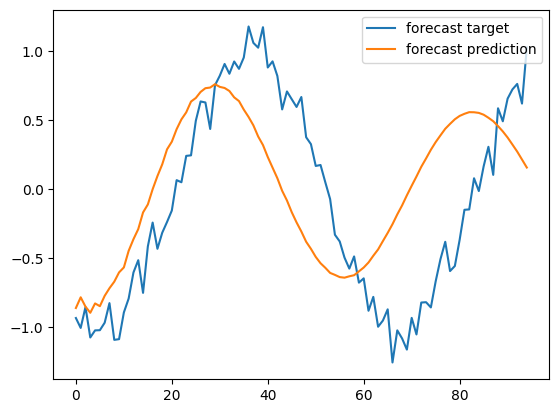

In [8]:
validation_target = Y[N//2:]
validation_predictions = []
last_x = X[N//2]
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0]
    validation_predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

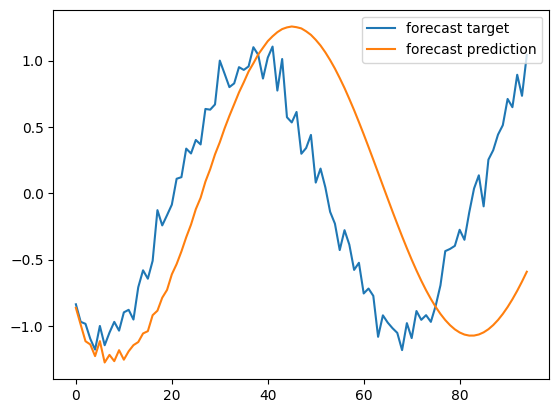